In [1]:
from main import *

Datei öffnen:

In [2]:
audio_arr, sr = openFile(r"..\viblib\v-10-21-3-33.wav")

File ..\viblib\v-10-21-3-33.wav exists.


# Amplitude über gesamtes Signal

[[4, 1.4688634e-06],
 [5, 6.4953787e-07],
 [6, 2.536447e-06],
 [8, 1.6075926e-06],
 [9, 2.293395e-06],
 [11, 4.2151496e-06],
 [12, 3.171745e-06],
 [13, 1.8372084e-06],
 [14, 4.547368e-06],
 [15, 4.3062696e-06],
 [16, 3.8350645e-06],
 [20, 1.6101894e-06],
 [21, 4.2857744e-07],
 [22, 1.5465274e-06],
 [23, 1.3981919e-06],
 [24, 2.9775804e-06],
 [26, 2.3158e-06],
 [27, 4.7142394e-06],
 [28, 3.0721853e-06],
 [30, 6.064621e-06],
 [31, 8.8924335e-06],
 [32, 7.3281317e-06],
 [33, 6.352507e-06],
 [35, 5.027339e-07],
 [36, 4.5933416e-07],
 [37, 4.0204e-06],
 [38, 3.4643163e-06],
 [39, 4.4318112e-06],
 [40, 5.0797557e-06],
 [41, 1.6543523e-06],
 [43, 1.1588793e-07],
 [44, 1.3095569e-06],
 [45, 2.1615629e-06],
 [47, 1.9264903e-06],
 [49, 1.2317307e-06],
 [51, 4.7428898e-08],
 [52, 2.0978193e-06],
 [53, 3.480827e-06],
 [54, 4.95361e-06],
 [56, 2.5869906e-06],
 [57, 1.4087466e-06],
 [58, 3.0499993e-07],
 [59, 3.843673e-06],
 [60, 3.6064728e-06],
 [61, 1.01421e-06],
 [64, 1.854634e-06],
 [67, 1.13159

<Figure size 640x480 with 0 Axes>

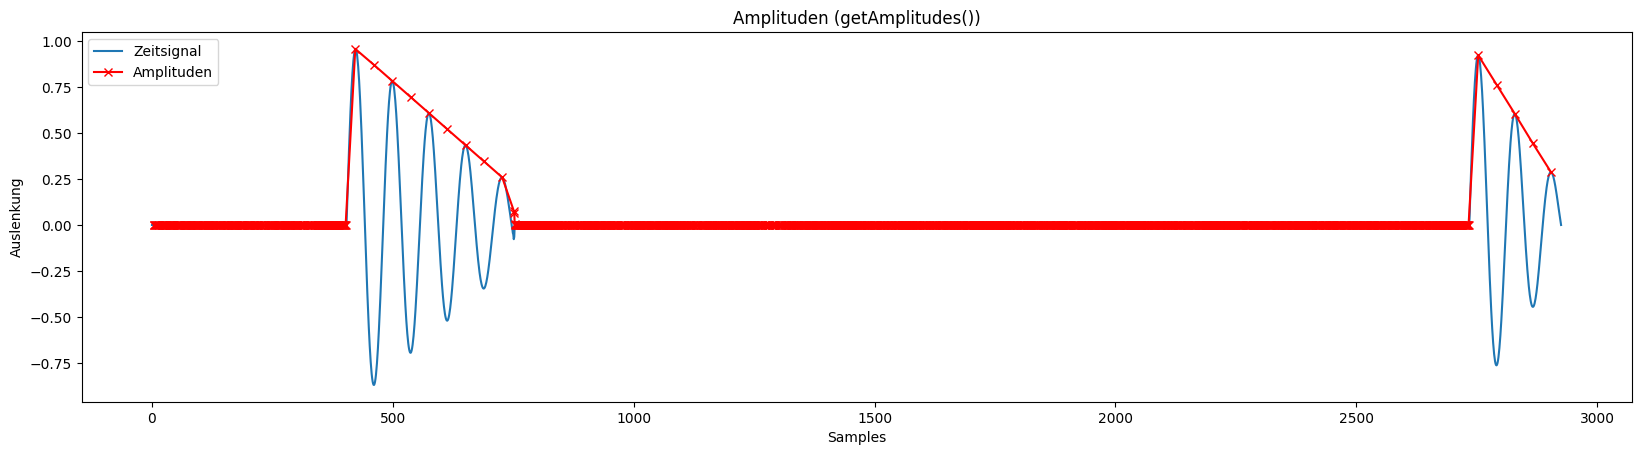

In [3]:
plt.figure(4000)
getAmplitudes(audio_arr=audio_arr, sr=sr)


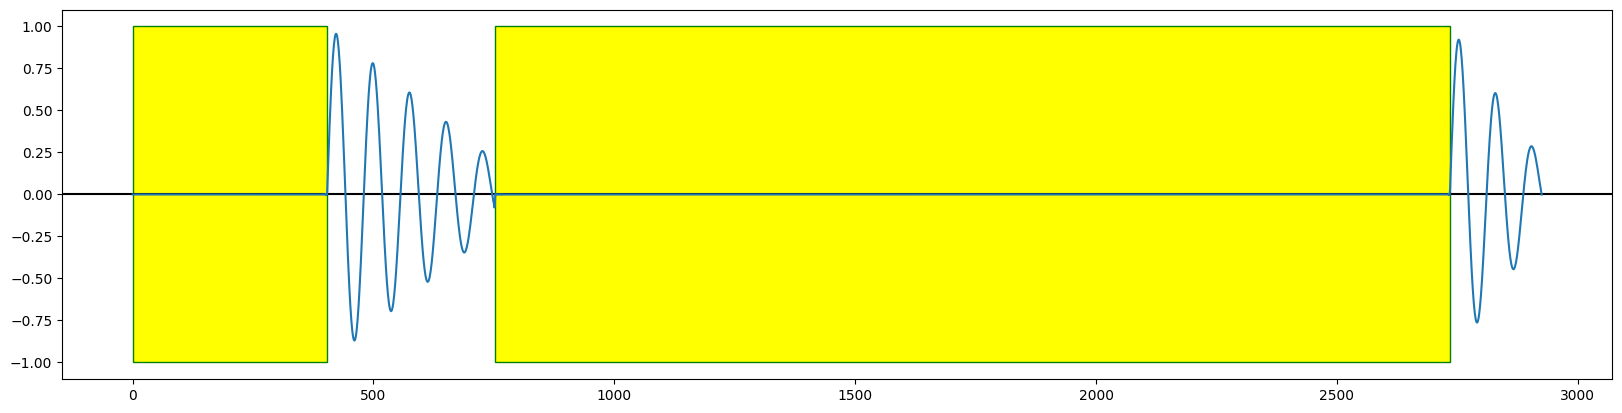

In [4]:
breaks_list = findBreaks(audio_arr=audio_arr, sr=sr) #findet Pausen in Audio Array

# Amplituden berechnen

Die eigentlichen Amplituden werden mittels getAmplitudes() gefunden

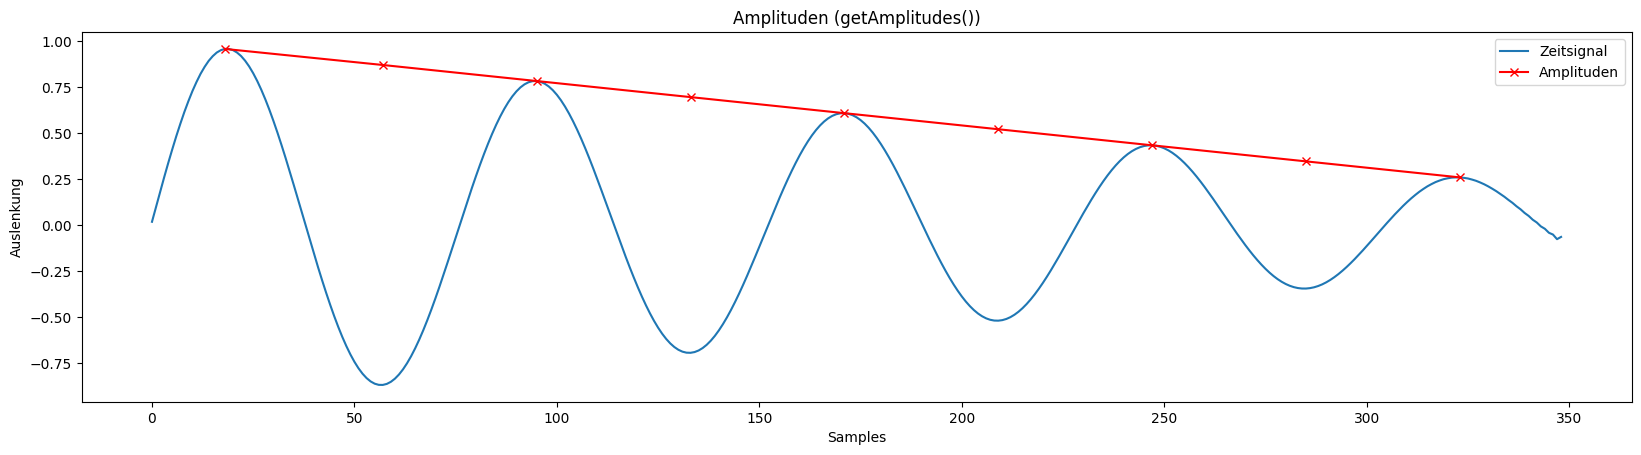

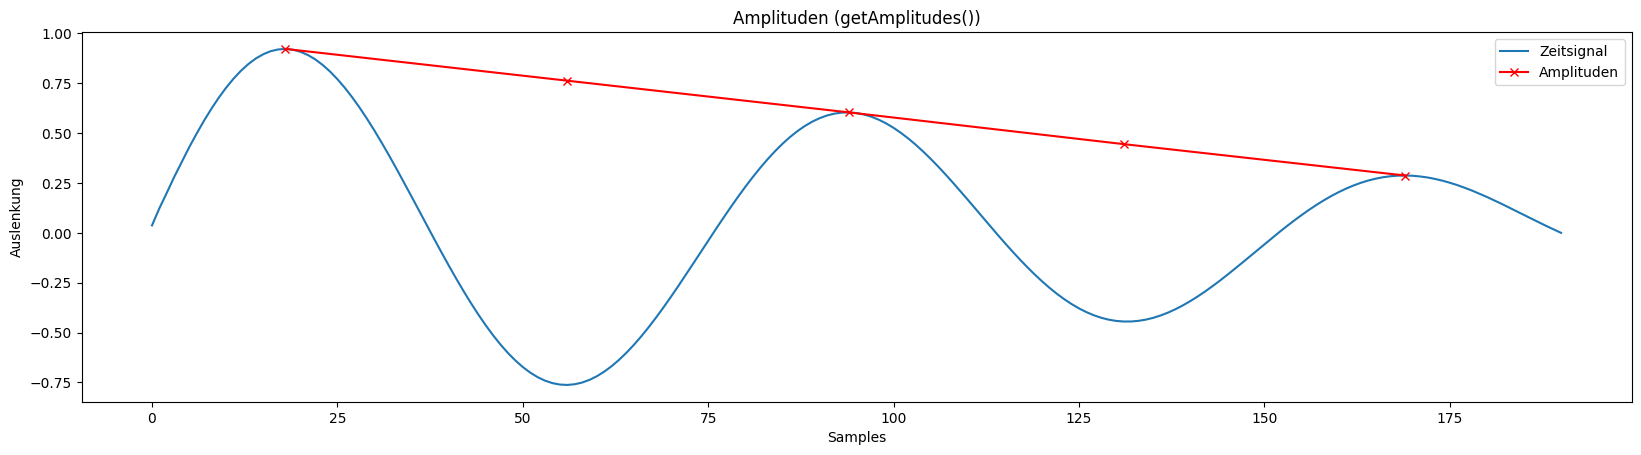

In [5]:
audio_arr_list = splitAudioArrAtBreaks(audio_arr=audio_arr, breaksList=breaks_list)
amplitudes = []
if audio_arr_list is not None:
  for audio in audio_arr_list:
    amplitudes.append(getAmplitudes(audio,sr=sr))

Die Amplituden werden interpoliert (interpolate()), so dass eine kontinuierlicher Graph entsteht, aus dem das RMS gebildet werden kann.

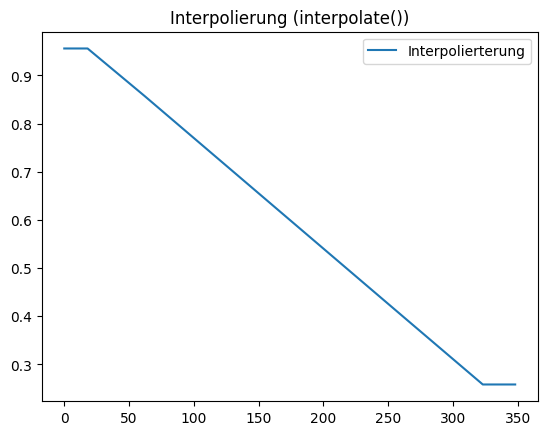

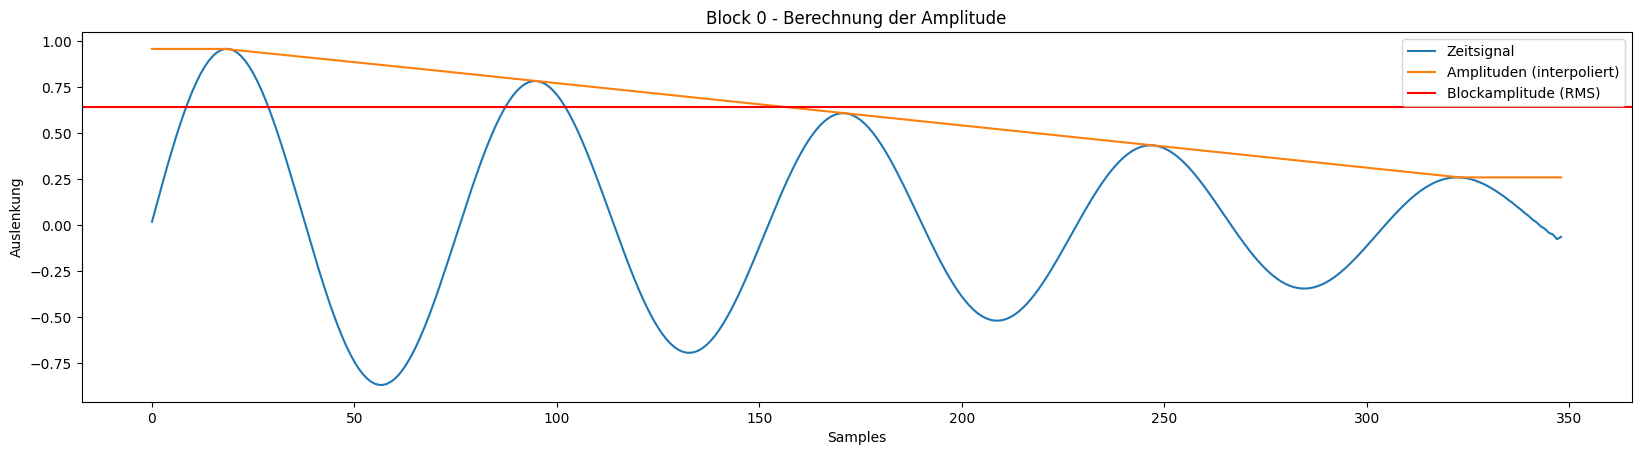

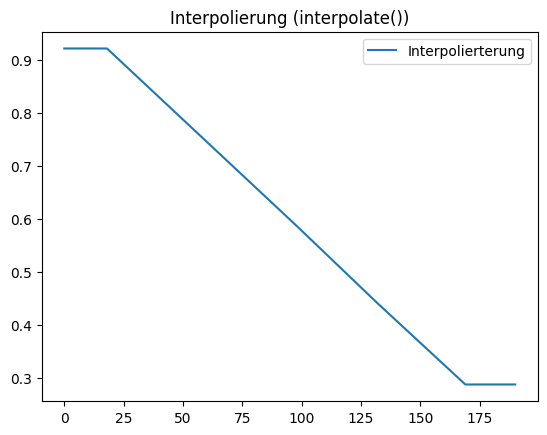

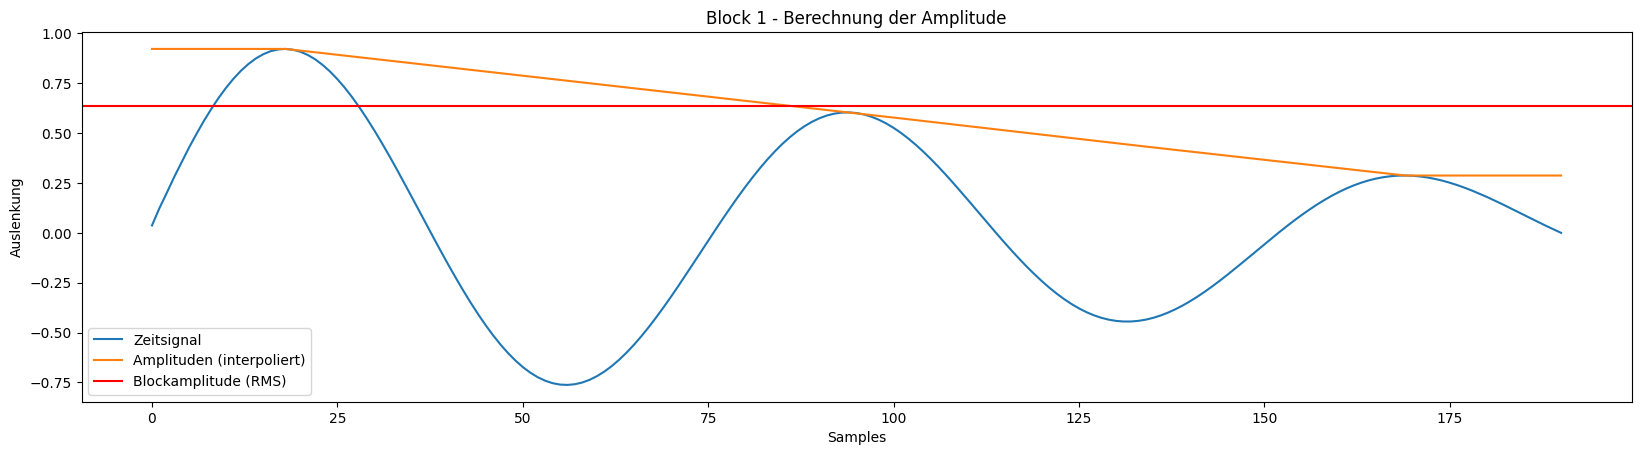

In [6]:
for i in range(0,len(amplitudes)):
    if amplitudes[i] is not None and len(amplitudes[i]) > 0:
        interpolated = interpolate(amplitudes[i], len(audio_arr_list[i]))
        arms = rms(interpolated)
        plt.figure(1000 + i).set_figwidth(20)
        plt.plot(audio_arr_list[i], label="Zeitsignal")
        plt.plot(interpolated, label="Amplituden (interpoliert)")
        plt.axhline(arms, color="red", label = "Blockamplitude (RMS)")
        plt.xlabel("Samples")
        plt.ylabel("Auslenkung")
        plt.title("Block " + str(i) + " - Berechnung der Amplitude")
        plt.legend()


# Frequenzerkennung

c:\Users\Domin\anaconda3\envs\WtT\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


tensorflow: 2.16.1



tensorflow: 2.16.1
Frequenz:  212.45532
Frequenz:  228.52263


c:\Users\Domin\anaconda3\envs\WtT\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=349
  warnings.warn(
c:\Users\Domin\anaconda3\envs\WtT\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=191
  warnings.warn(


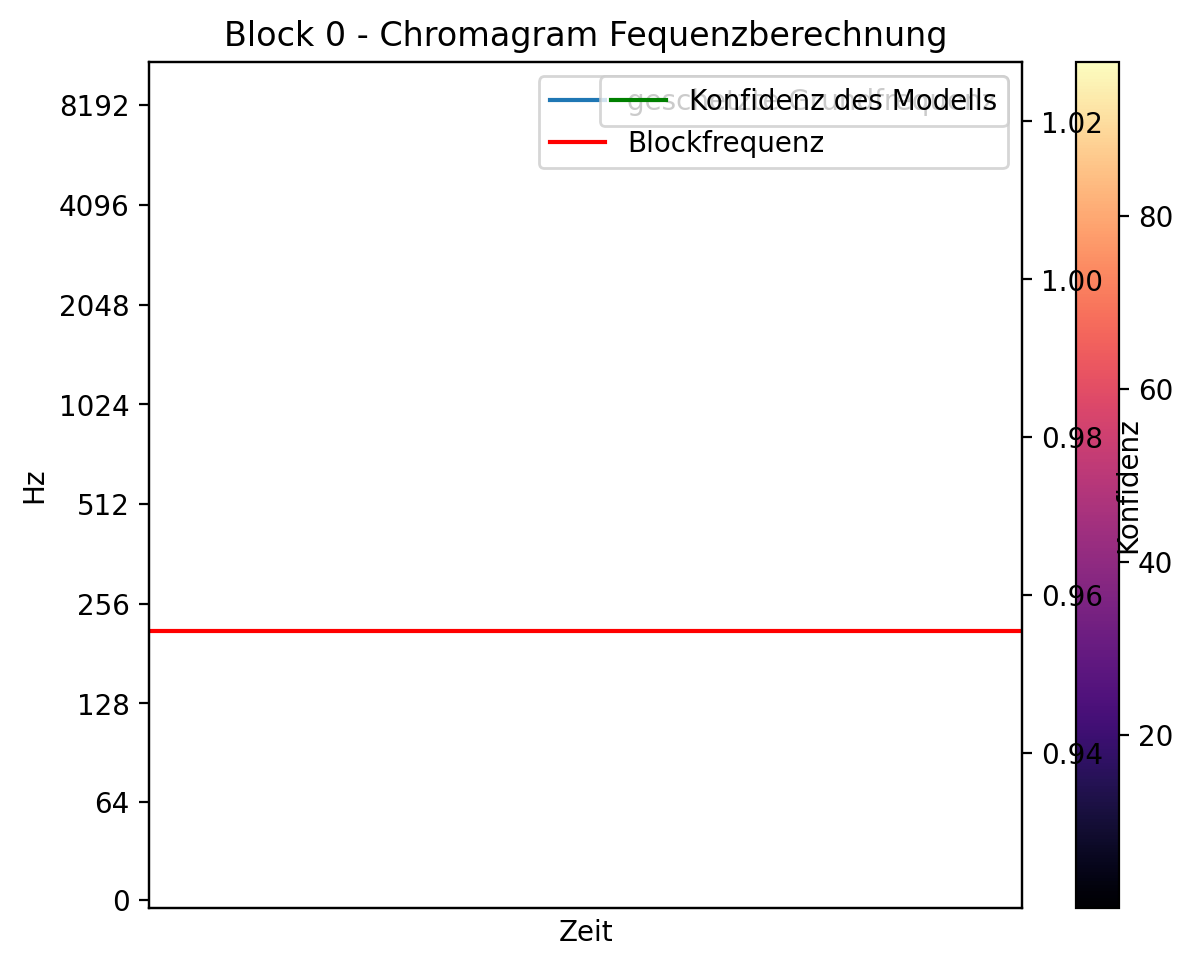

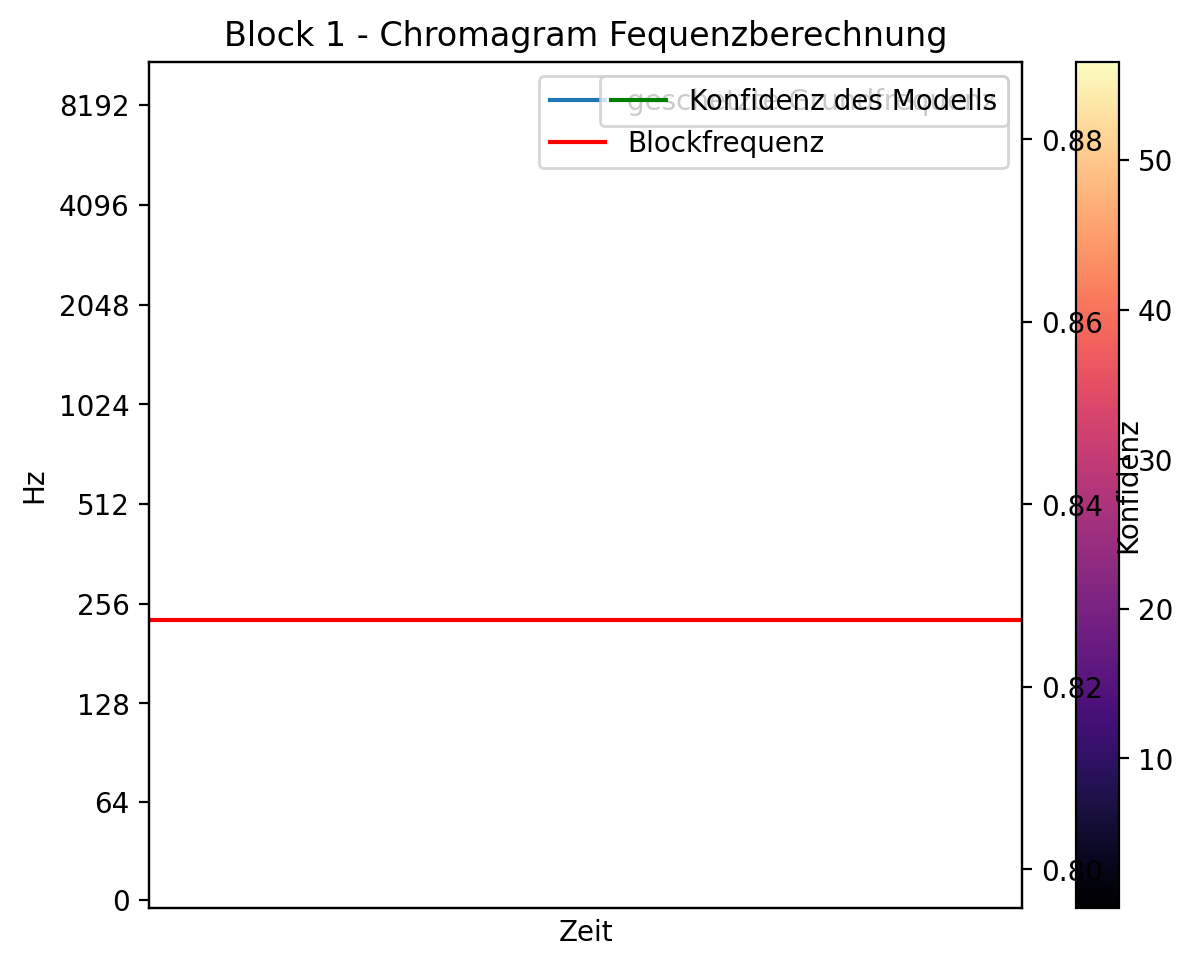

In [7]:
from aiBasefrequency import *
import librosa

i = 0
for audio in audio_arr_list:
    if len(audio) > 1:
        if amplitudes[i] is not None and len(amplitudes[i]) > 0:
            plt.figure(2000 + i)
            plt.title("Block " + str(i) + " - Chromagram Fequenzberechnung")

            frequency,uncertainty = getFrequencies(audio,sr=sr)
            confidence = 1 - uncertainty

            frequency = outputTooHz(frequency)
        
            plt.plot(frequency, label="geschetzte Grundfrequenz")
            frequency = rms(frequency)
            print("Frequenz: ", frequency)

            S = numpy.abs(librosa.stft(audio))

            img = librosa.display.specshow(S, y_axis='log')
            plt.colorbar()
            plt.tight_layout()
            plt.axhline(frequency, color="red", label = "Blockfrequenz")
            plt.legend()
            plt.xlabel("Zeit")
            plt.twinx()
            plt.plot(confidence, color="green", label="Konfidenz des Modells")
            plt.ylabel("Konfidenz")
            plt.legend()
    
            i += 1

    

# Blöcke über Amplitude

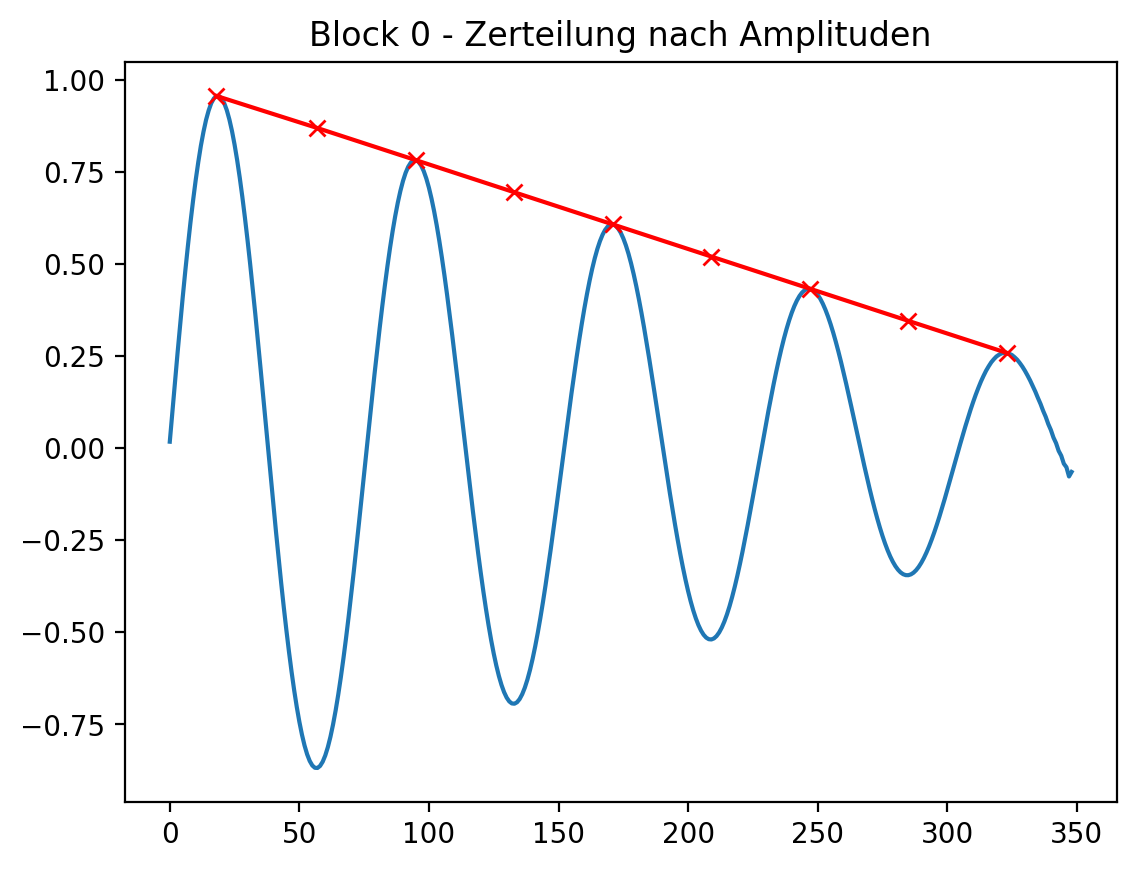

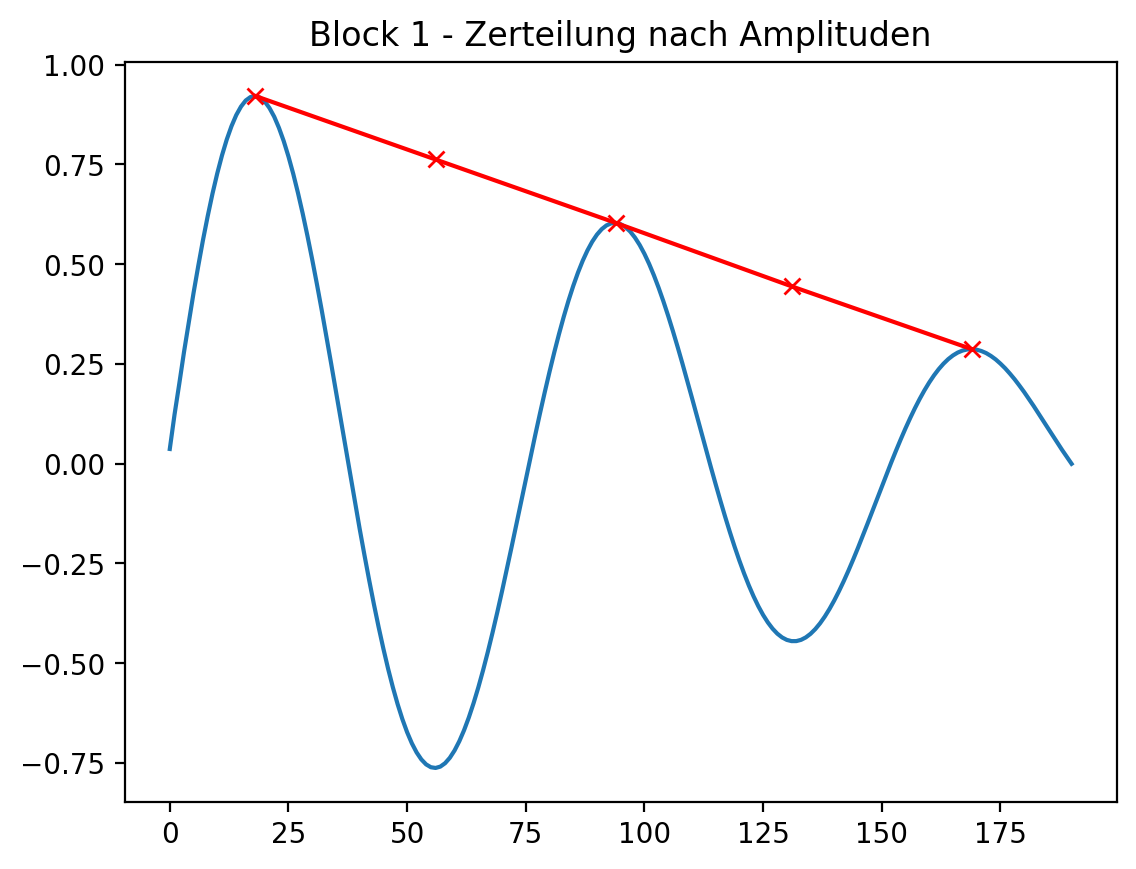

In [8]:

for i in range(len(amplitudes)):
    signal_blocks, indices= simpleSplitByAmplitude(audio_arr=audio_arr_list[i], amplitudes=amplitudes[i], sr=sr)
    plt.figure()
    plt.title("Block " + str(i) + " - Zerteilung nach Amplituden")
    plt.plot(audio_arr_list[i])
    plt.plot([row[0] for row in amplitudes[i]],[row[1] for row in amplitudes[i]], marker="x", color="red")
    for index in indices:
        plt.axvline(x=index, color="red")


In [9]:
from hlabs import *

for i in range(len(amplitudes)):
    if amplitudes[i] is not None and len(amplitudes[i]) > 0:

        signal_blocks, indices= simpleBlockByAmplitude(audio_arr=audio_arr_list[i], amplitudes=amplitudes[i], sr=sr)

        hBlocks = [HlabsBlock(type=HlabsType.SINUS, start_time=0, end_time=indices[0],full_sound_array=audio_arr_list[i])]

        for j in range(0,len(indices)-1):
            hBlocks.append(HlabsBlock(type=HlabsType.SINUS, start_time=indices[j], end_time=indices[j+1],full_sound_array=audio_arr_list[i]))

        hBlocks.append(HlabsBlock(type=HlabsType.SINUS, start_time=indices[-1], end_time=len(audio_arr_list[i]),full_sound_array=audio_arr_list[i]))


TypeError: '>=' not supported between instances of 'int' and 'list'